<a href="https://colab.research.google.com/github/bariskucuk1999/data-science-notes/blob/main/Lojistik_Regresyon_%26_KNN_Algoritmas%C4%B1_%26_Support_Vector_Classifier(SVC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lojistik Regresyon**

In [ ]:
#sigmoid fonksiyonu, step fonksiyonu
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
veriler=pd.read_csv("veriler.txt")
veriler

,ulke,boy,kilo,yas,cinsiyet
0,tr,130,30,10,e
1,tr,125,36,11,e
2,tr,135,34,10,k
3,tr,133,30,9,k
4,tr,129,38,12,e
5,tr,180,90,30,e
6,tr,190,80,25,e
7,tr,175,90,35,e
8,tr,177,60,22,k
9,us,185,105,33,e


In [ ]:
x=veriler.iloc[:,1:4] #bağımsız değişkenler(boy,kilo,yas)
y=veriler.iloc[:,4:] #bağımlı değişken(cinsiyet)
from sklearn.model_selection import train_test_split #verinin satır bazlı bölünmesi
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.33,random_state=0) #%33 test, %67 train
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(x_train)
X_test=sc.transform(x_test) #fit_transform yerine transform kullanırız

In [ ]:
from sklearn.linear_model import LogisticRegression
logr=LogisticRegression(random_state=0)
logr.fit(X_train,y_train) #x'ten y'yi öğrenmektedir
y_pred=logr.predict(X_test)
y_pred #x_test için tahmin

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['e', 'e', 'e', 'e', 'k', 'e', 'e', 'e'], dtype=object)

In [ ]:
x_test

,boy,kilo,yas
20,164,66,32
10,165,55,27
14,167,62,55
13,162,59,41
1,125,36,11
21,166,56,42
11,155,50,44
19,159,40,29


In [ ]:
y_test

,cinsiyet
20,k
10,k
14,k
13,k
1,e
21,k
11,k
19,k


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm #diyagonaldakiler doğru sınıflandırılanlar=0 adet(örnek için)
#error 7/8

array([[0, 1],
       [7, 0]])

# **KNN Algoritması(En yakın komşu)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,metric="minkowski")
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([[0, 1],
       [6, 1]])

In [ ]:
knn=KNeighborsClassifier(n_neighbors=1,metric="minkowski")
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm #n_neighbors sayısını azaltınca başarı(diyagonaldakiler) 1'den 7'ye çıktı

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([[1, 0],
       [1, 6]])

# **Support Vector Classifier(SVC)**

In [ ]:
from sklearn.svm import SVC
svc=SVC(kernel="linear")
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[0, 1],
       [6, 1]])

In [ ]:
from sklearn.svm import SVC
svc=SVC(kernel="rbf") #kernel'ı rbf seçersek başarı oranı artar
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[1, 0],
       [5, 2]])

**SVM'de(Classification için SVC) Çekirdek Hilesi**

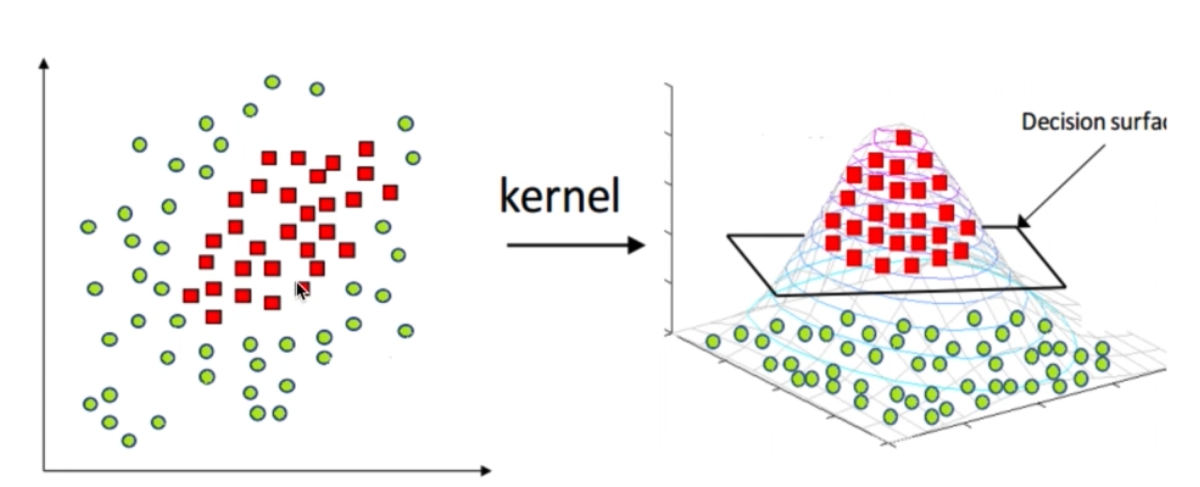

In [ ]:
from sklearn.svm import SVC
svc=SVC(kernel="poly") #kernel'ı poly seçtiğimizde başarı oranı düştü
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[1, 0],
       [7, 0]])